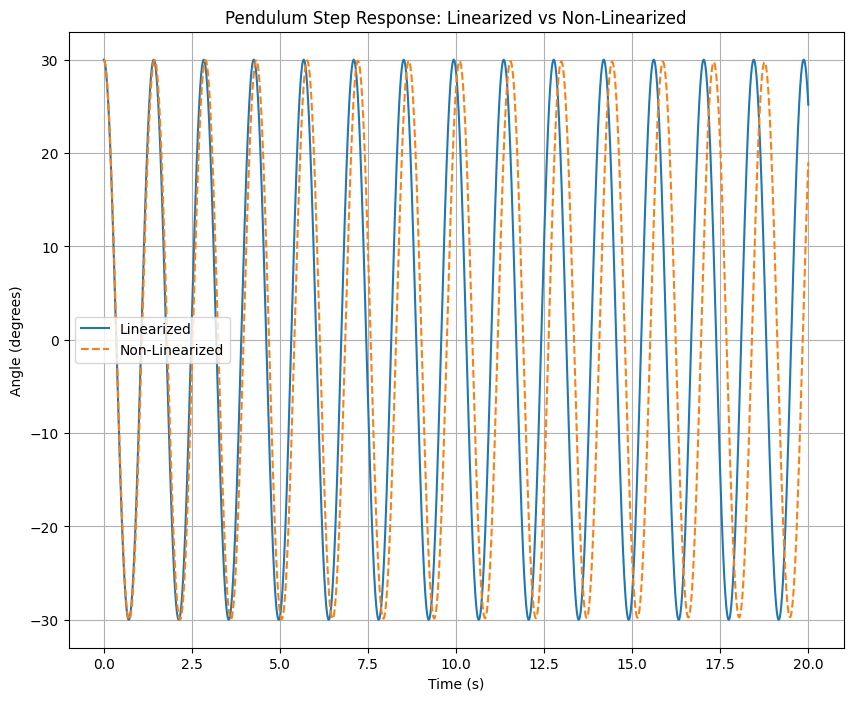

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

L = 0.5
m = 1
g = 9.8

theta_0 = 30
t = np.arange(0, 20, 0.001)

# linearized pendulum 
sys = ct.tf([1, 0, 0], [1, 0, g/L]) * np.radians(theta_0)
y = sys.step_response(t).outputs

# non-linearized pendulum
def pendulum_ode(t, x, L, m, g):
    theta, omega = x
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

x0 = [np.radians(theta_0), 0]
sol = solve_ivp(pendulum_ode, [0, 20], x0, t_eval=t, args=(L, m, g))
y_nl = sol.y[0]

plt.figure(figsize=(10, 8))
plt.plot(t, y * 180 / np.pi)
plt.plot(t, y_nl * 180 / np.pi, linestyle='--')
plt.title('Pendulum Step Response: Linearized vs Non-Linearized')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend(['Linearized', 'Non-Linearized'])
plt.grid()
plt.show()
